In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('criminal_train.csv')
data.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [3]:
train = data.drop('Criminal',axis =1)
train = train.drop('PERID',axis =1)
train.head()

,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,4,2,4,1,3,1,1,1,99,99,...,2,1,2,1,1,2,2,3884.805998,40026,1
1,4,1,3,1,2,1,1,1,99,99,...,1,2,2,2,3,2,2,1627.108106,40015,2
2,4,1,2,1,2,1,1,1,99,99,...,1,2,2,2,3,2,2,4344.957980,40024,1
3,4,0,2,1,1,1,1,1,99,99,...,3,2,2,1,1,2,2,792.521931,40027,1
4,1,0,6,1,4,1,1,1,99,1,...,1,2,2,2,2,2,2,1518.118526,40001,2


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, 
                                                    data['Criminal'], test_size=0.30, 
                                                    random_state=101)

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
logmodel = LogisticRegression(penalty='l1', max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
predictions = logmodel.predict(X_test)


In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97     12750
          1       0.65      0.35      0.46       966

avg / total       0.93      0.94      0.93     13716



In [11]:
test = pd.read_csv('criminal_test.csv')
test = test.drop('PERID',axis =1)
test.head()

,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,4,0,4,1,2,1,1,1,99,99,...,2,2,2,1,1,2,2,16346.795400,40020,1
1,4,0,4,1,1,1,1,1,99,99,...,3,2,2,1,1,2,2,3008.863906,40044,2
2,2,0,3,1,2,1,1,1,99,1,...,1,2,2,2,2,2,2,266.952503,40040,2
3,4,0,6,1,2,1,1,1,99,99,...,3,2,2,1,1,2,2,5386.928199,40017,1
4,1,0,4,1,3,1,1,1,99,1,...,3,2,1,1,1,2,2,173.489895,40017,1


In [12]:
predictions2 = logmodel.predict(test)


In [13]:
predictions2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
knn = KNeighborsClassifier(n_neighbors=2)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [18]:
pred = knn.predict(X_test)

In [19]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96     12750
          1       0.29      0.03      0.06       966

avg / total       0.89      0.93      0.90     13716



In [20]:
X_train.shape[1]

70

In [21]:
data['Criminal'].value_counts()

0    42543
1     3175
Name: Criminal, dtype: int64

In [22]:
data['IFATHER'].unique()

array([ 4,  1,  2,  3, -1], dtype=int64)

In [23]:
data['IIHHSIZ2'].unique()

array([ 1,  3, -1], dtype=int64)

In [24]:
c =data.corr().abs()
c

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
PERID,1.000000,0.000370,0.004661,0.004180,0.003580,0.001641,0.004493,0.002755,0.003110,0.010388,...,0.007988,0.008000,0.002207,0.002366,0.002922,0.003338,0.003969,0.008561,0.003490,0.000396
IFATHER,0.000370,1.000000,0.292649,0.316373,0.020092,0.456600,0.015866,0.123218,0.018685,0.001902,...,0.001188,0.003782,0.008986,0.005727,0.008026,0.009040,0.271299,0.024717,0.001650,0.049935
NRCH17_2,0.004661,0.292649,1.000000,0.361402,0.046243,0.528787,0.052374,0.138690,0.052981,0.050937,...,0.011360,0.011255,0.020646,0.024687,0.006669,0.006760,0.002526,0.011120,0.001137,0.091212
IRHHSIZ2,0.004180,0.316373,0.361402,1.000000,0.000186,0.760678,0.037206,0.132342,0.044797,0.081839,...,0.002691,0.000974,0.031969,0.030267,0.020827,0.020117,0.167459,0.020170,0.001951,0.068281
IIHHSIZ2,0.003580,0.020092,0.046243,0.000186,1.000000,0.000182,0.496536,0.010129,0.392551,0.012797,...,0.256990,0.257686,0.005539,0.002939,0.033680,0.033567,0.006109,0.215724,0.008187,0.009238
IRKI17_2,0.001641,0.456600,0.528787,0.760678,0.000182,1.000000,0.015039,0.218232,0.022155,0.008528,...,0.002135,0.000163,0.013275,0.014604,0.024837,0.025169,0.214389,0.018164,0.004692,0.039168
IIKI17_2,0.004493,0.015866,0.052374,0.037206,0.496536,0.015039,1.000000,0.007086,0.742514,0.005976,...,0.124735,0.124877,0.003537,0.000924,0.011260,0.011291,0.001271,0.107100,0.000032,0.005860
IRHH65_2,0.002755,0.123218,0.138690,0.132342,0.010129,0.218232,0.007086,1.000000,0.002563,0.013770,...,0.008629,0.009968,0.025387,0.028685,0.000133,0.000659,0.340106,0.030275,0.007803,0.112589
IIHH65_2,0.003110,0.018685,0.052981,0.044797,0.392551,0.022155,0.742514,0.002563,1.000000,0.015414,...,0.098446,0.098067,0.013368,0.009412,0.002704,0.002794,0.013824,0.090249,0.000568,0.004112
PRXRETRY,0.010388,0.001902,0.050937,0.081839,0.012797,0.008528,0.005976,0.013770,0.015414,1.000000,...,0.003236,0.003815,0.018948,0.022242,0.002736,0.002548,0.039239,0.052931,0.002891,0.004966


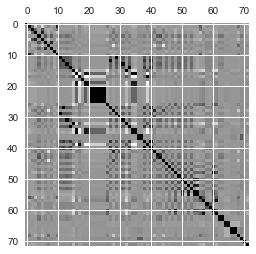

In [25]:
plt.matshow(data.corr())


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [28]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      0.96      0.96     12750
          1       0.53      0.57      0.55       966

avg / total       0.94      0.93      0.94     13716

